In [60]:
# Load Libraries
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
import numpy as np
from numpy import set_printoptions
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import Binarizer

In [68]:
file_path = "dataset/glass/glass.data"
names = ["ID", "RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "class"]
X_names = ["RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe"]
dataset = read_csv(file_path, names=names)

Y = dataset['class']
X = dataset.drop(['ID','class'], axis=1)


The Pearson correlation coefficient, often denoted by r, is a statistical measure that captures the strength and direction of the linear relationship between two continuous variables. The coefficient ranges from -1 to 1, inclusive:


r=1: Perfect positive linear correlation. As one variable increases, the other also increases proportionally.

r=−1: Perfect negative linear correlation. As one variable increases, the other decreases proportionally.

r=0: No linear correlation. The variables are not linearly related, although they could still be related in a nonlinear manner.

In [69]:
X.corr(method='pearson')

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000


Positive Skew (Right Skew): In a positively skewed distribution, the right tail (larger values) is longer than the left tail (smaller values). The mean is greater than the median in such distributions.

Negative Skew (Left Skew): In a negatively skewed distribution, the left tail (smaller values) is longer than the right tail (larger values). The mean is less than the median in such distributions.

Zero Skew (Symmetrical): If the distribution is perfectly symmetrical, it has zero skewness. In this case, the mean and the median are equal.

In [70]:
X.skew()

RI    1.625431
Na    0.454181
Mg   -1.152559
Al    0.907290
Si   -0.730447
K     6.551648
Ca    2.047054
Ba    3.416425
Fe    1.754327
dtype: float64

Univariate visualizations give a count of the number of observations in each bin.

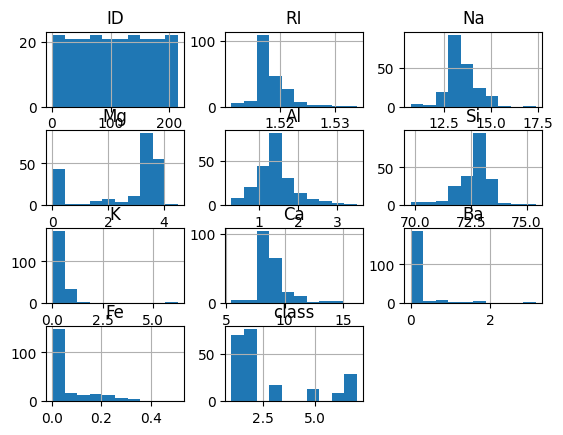

<Figure size 1000x1000 with 0 Axes>

In [71]:

dataset.hist()
plt.figure(figsize=(10, 10))
plt.tight_layout()
plt.show()

Density plots better visualize the distribution of each attribute

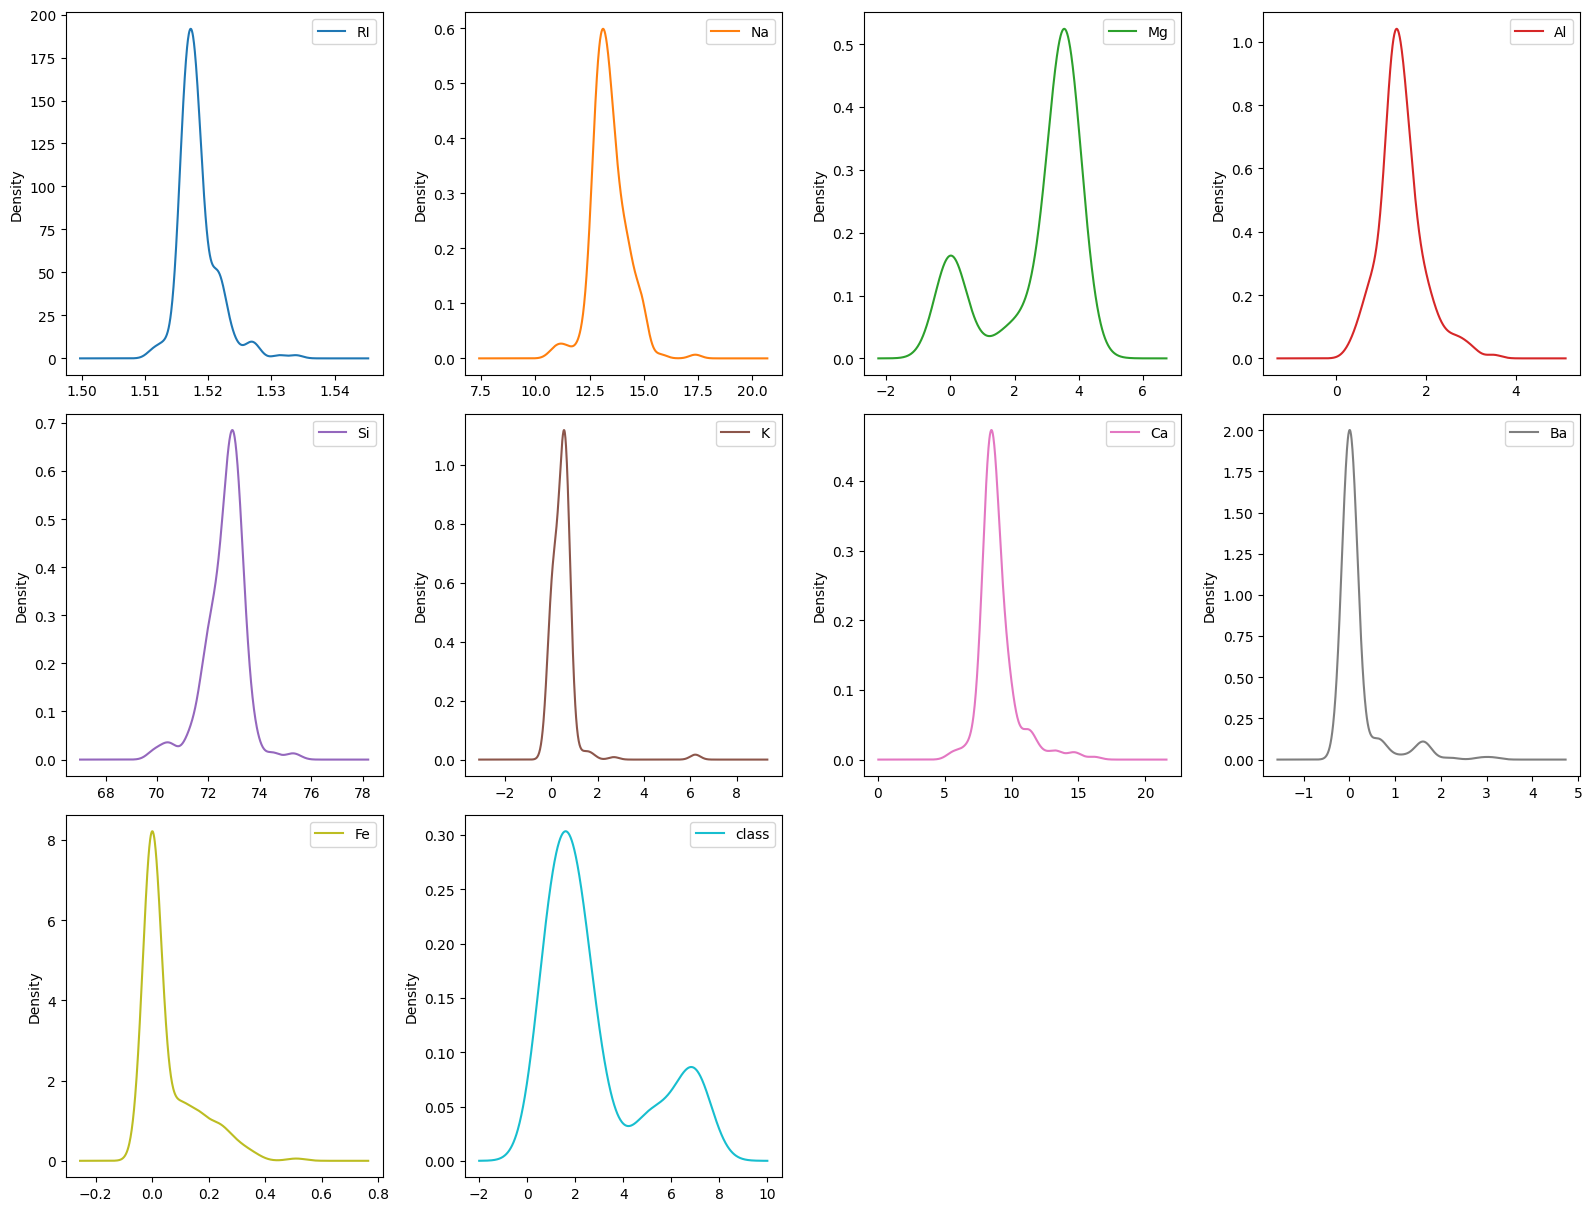

In [84]:
dataset.drop('ID', axis=1).plot(kind='density', subplots=True, layout=(4,4), sharex=False, figsize=(16,16))
plt.tight_layout()
plt.show()

Box and Whisker Plots help us understand the spread of data as well as the candidate outlier values.

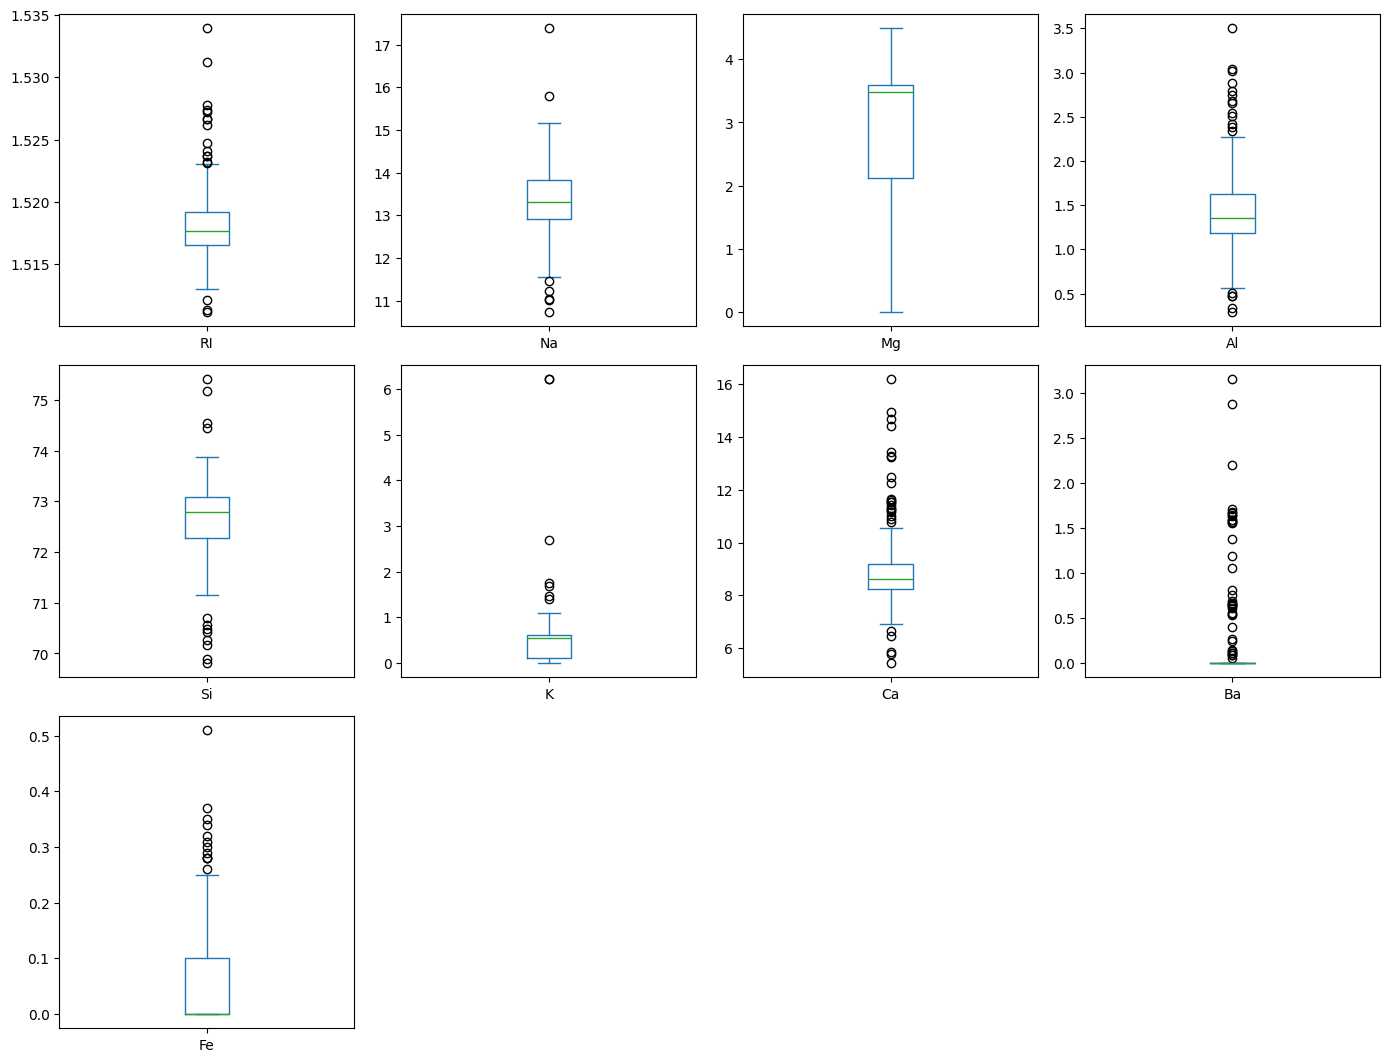

In [73]:
X.plot(kind='box', subplots=True, layout=(4,4), sharex=False, figsize=(14,14))
plt.tight_layout()
plt.show()

In [80]:
outlier_ratios = {}

for feature in X.columns:
    Q1 = X[feature].quantile(0.25)
    Q3 = X[feature].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = X[(X[feature] < lower_bound) | (X[feature] > upper_bound)]
    non_outliers = X[(X[feature] >= lower_bound) & (X[feature] <= upper_bound)]

    if len(non_outliers) == 0:
        ratio = "undefined"
    else:
        ratio = len(outliers) / len(non_outliers)

    outlier_ratios[feature] = ratio
    
set_printoptions(precision=3)
print("Outlier Ratios:", outlier_ratios)

Outlier Ratios: {'RI': 0.08629441624365482, 'Na': 0.033816425120772944, 'Mg': 0.0, 'Al': 0.09183673469387756, 'Si': 0.0594059405940594, 'K': 0.033816425120772944, 'Ca': 0.13829787234042554, 'Ba': 0.2159090909090909, 'Fe': 0.0594059405940594}


Correlation matrices visualize how related the changes are between two variables.

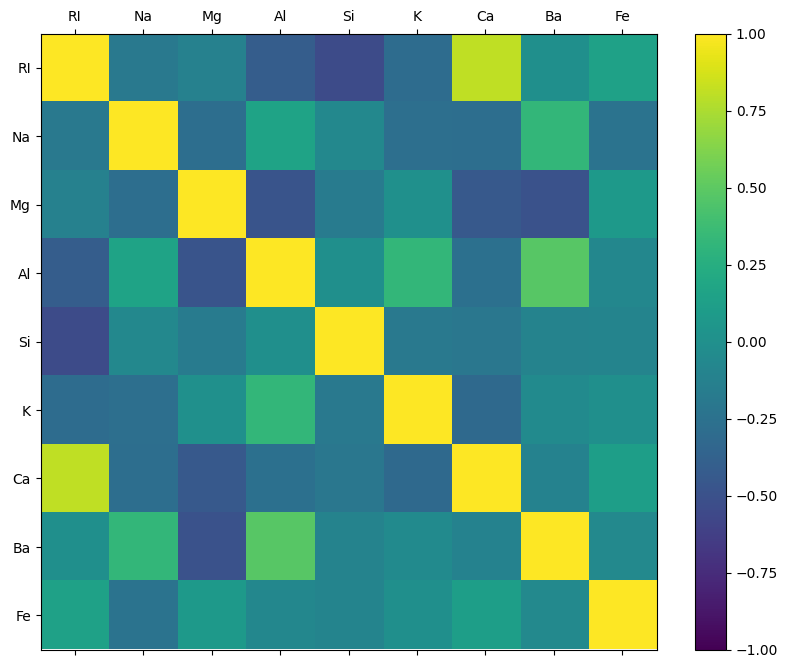

In [75]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
cax = ax.matshow(X.corr(), vmin=-1,vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_yticklabels(X_names)
ax.set_xticklabels(X_names)
plt.show()

Rescale data to values between -1 and 1

In [77]:
scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)
# summarize transformed data
set_printoptions(precision=3)
print(normalizedX[0:5, :])

[[2.062e-02 1.850e-01 6.088e-02 1.492e-02 9.733e-01 8.136e-04 1.186e-01
  0.000e+00 0.000e+00]
 [2.035e-02 1.863e-01 4.827e-02 1.824e-02 9.753e-01 6.437e-03 1.050e-01
  0.000e+00 0.000e+00]
 [2.028e-02 1.810e-01 4.749e-02 2.060e-02 9.764e-01 5.217e-03 1.041e-01
  0.000e+00 0.000e+00]
 [2.040e-02 1.776e-01 4.961e-02 1.734e-02 9.762e-01 7.663e-03 1.105e-01
  0.000e+00 0.000e+00]
 [2.028e-02 1.773e-01 4.838e-02 1.657e-02 9.766e-01 7.350e-03 1.078e-01
  0.000e+00 0.000e+00]]


Binarize Data

In [78]:
binarizer = Binarizer(threshold=0.0).fit(X)
binarizedX = binarizer.transform(X)
# summarize transformed data
set_printoptions(precision=3)
print(binarizedX[0:5, :])

[[1. 1. 1. 1. 1. 1. 1. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 0. 0.]]


## Overview

In analyzing the Glass Identification Database, multiple aspects of data exploration and preprocessing are considered to understand the features and their interrelations deeply.

## Correlation Analysis

By calculating the Pearson correlation coefficients, the linear relationship between the features is assessed. A heatmap visualization further accentuates this, offering insights into potential multicollinearity and guiding the feature selection process for machine learning model building.

## Skewness Assessment and Distribution Visualization

The skewness of the features is assessed to understand the symmetry of the data distribution. The histogram and density plots visually represent the distribution of each feature, offering insights into the data's nature (whether normally distributed or skewed). This information is crucial for selecting appropriate feature transformation or normalization techniques.

## Outlier Detection

A comprehensive outlier analysis is conducted for each feature, employing the Interquartile Range (IQR) method to identify and calculate the ratio of outliers. This analysis aids in understanding the data's cleanliness and robustness, guiding potential outlier treatment or removal to enhance model performance.

## Normalization and Binarization

To prepare the dataset for machine learning algorithms, normalization is applied, transforming the features to a common scale without distorting the differences in the range of values. This step is crucial for algorithms that are sensitive to feature scales. Further, the features are binarized, converting them into binary values based on a threshold, offering a simplified view and potentially enhancing the performance of certain algorithms.

## Conclusion

In sum, the Glass Identification Database analysis aims at a comprehensive understanding and preparation of the dataset for further analysis and model building. The visualization and statistical analysis offer a detailed insight into the data characteristics, providing a solid foundation for making informed decisions in the subsequent data preprocessing and machine learning model selection stages. The attention to outliers, data distribution, and feature scaling ensures the dataset is primed for effective and efficient model training, contributing to achieving higher accuracy and performance in the classification tasks.
